## PCA and Clustering on Glass data

After you've forked and cloned this notebook, please aim to answer all the questions that are commented and marked as "#QUESTION", not just aloud but in writing on a comment line below. This will help you assess and reflect on your own understanding when we go through the content. The stretch questions are marked as '#STRETCH'



In [1]:
import pandas as pd
import numpy as np

#STRETCH: look at the sub-module of sklearn we're importing PCA from: why is PCA located in this sub-module? Think about what PCA does.
#
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, hierarchical, AgglomerativeClustering, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, silhouette_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

import scipy.cluster.hierarchy as shc


/Users/ipreoteasa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.hierarchical module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

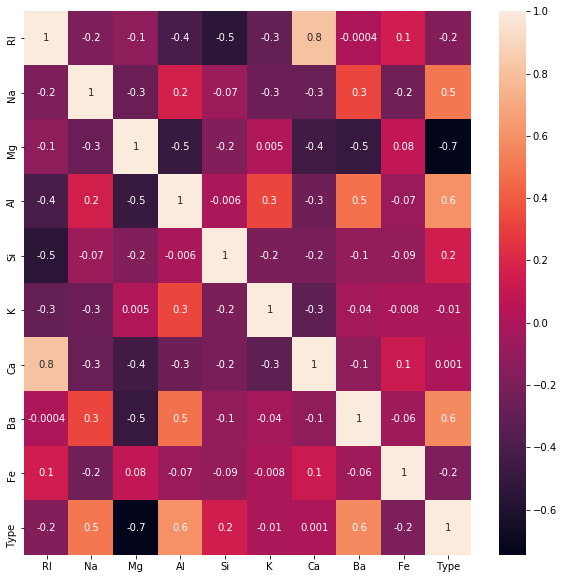

In [4]:
#QUESTION: How is the correlation matrix important in PCA?
#

plt.figure(figsize=(10,10))
corr = sns.heatmap(df.corr(), annot=True, fmt='.1g');

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Type']), df.Type, test_size=.2)

In [6]:
ss = StandardScaler()

x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

## PCA: the concept

## PCA: the math

PCA happens in roughly four steps:
 1. Scale your data (you'll have to do this separately
 2. 

If anyone recognises the following line of math below, feel free to speak up about it during the session. If you don't that's ok, you'll understand by the end of the session. 

### $ \underline{\underline{A}} * \underline{v} = \lambda{}\underline{v}$



In [19]:
# now let's instantiate a PCA object so we can do some dimensionality reduction and account for multicollinearity
pca = PCA(n_components=6)

In [20]:
pca_data = pca.fit_transform(x_train_scaled)

In [21]:
pca.explained_variance_ratio_

array([0.26936426, 0.24612464, 0.14905949, 0.12974363, 0.10178835,
       0.05508192])

In [26]:
# QUESTION: if a non-technical stakeholder asked you to interpret the value below, how would you go about this? 
# Make sure you think about: what PCA does, what does variance mean, in simpler terms, and why we might feel the need to do PCA in general
# HINTS: dimensionality reduction; information; 
#
#
pca.explained_variance_ratio_.sum()

0.9511622822551361

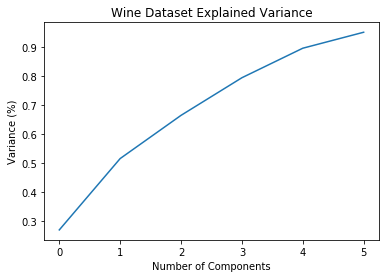

In [25]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Wine Dataset Explained Variance')
plt.show()

In [24]:
# QUESTION: so with 3 Principal Components, what % of the variance are we able to explain? 


# We will now take just 3 components of PCA data. We want to reinstantiate the PCA object and transform our data. 
# QUESTION: how would you complete the code below to do so? Fill in the lines and uncomment them.

# pca = PCA(n_components= )
# pca_train_data = pca.fit_()
# pca_test_data = pca.

# STRETCH: what line would we run here to check how much of the variance we're explaining? Try to answer first without looking above



In [28]:
km = KMeans(n_clusters=3)


In [29]:
 km.fit(pca_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
predicted = km.predict(pca_data)

In [31]:
predicted

array([0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2], dtype=int32)

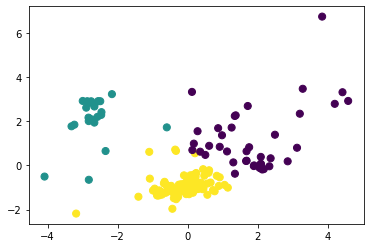

In [32]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=predicted, s=50, cmap='viridis');
plt.show();

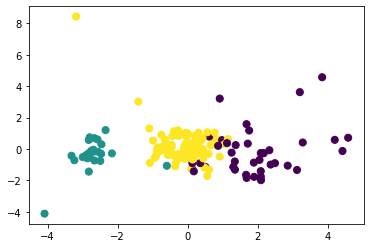

In [33]:
plt.scatter(pca_data[:, 0], pca_data[:, 2], c=predicted, s=50, cmap='viridis');
plt.show();

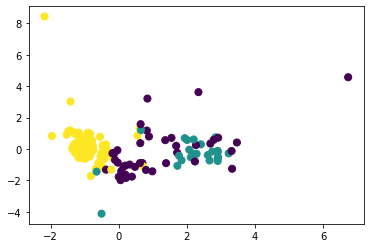

In [34]:
plt.scatter(pca_data[:, 1], pca_data[:, 2], c=predicted, s=50, cmap='viridis');
plt.show();

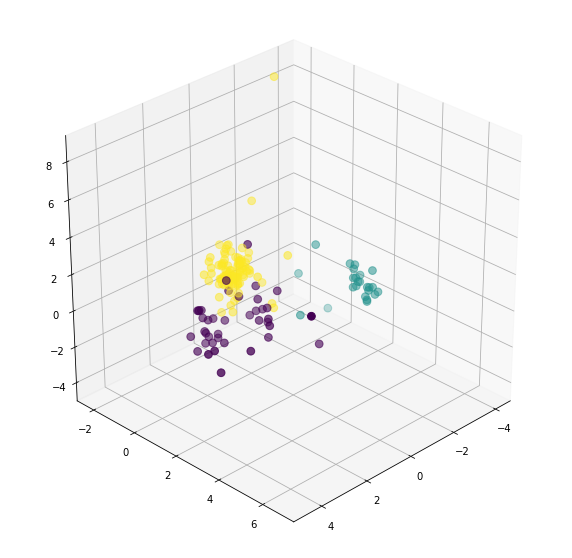

In [35]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1],pca_data[:,2], c=predicted, s=60)
ax.view_init(30, 45)
plt.show()

In [36]:
silhouette_score(pca_data, predicted)

0.3962682671369165

In [37]:
km_standard = KMeans(n_clusters=3)
km_standard.fit(x_train)
predicted_std = km_standard.predict(x_train)
silhouette_score(x_train, predicted_std)


0.5988749745613026

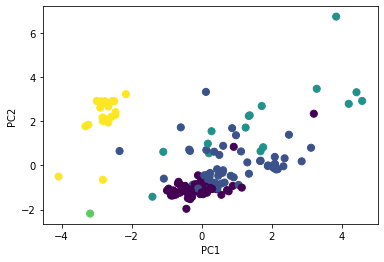

In [38]:
aggcl = AgglomerativeClustering(n_clusters=5)
predicted_agg = aggcl.fit_predict(pca_data)
plt.figure(figsize=(6,4))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=predicted_agg, s=50, cmap='viridis');

In [39]:
silhouette_score(pca_data, predicted)


0.3962682671369165

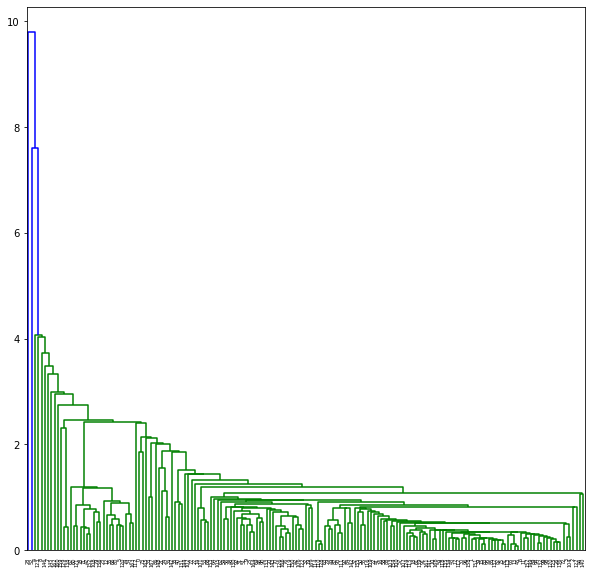

In [40]:
linked = shc.linkage(pca_data, 'single')
plt.figure(figsize=(10, 10))
# Step 2: Plot the hierarchical clustering as a dendrogram
shc.dendrogram(linked)
plt.show()

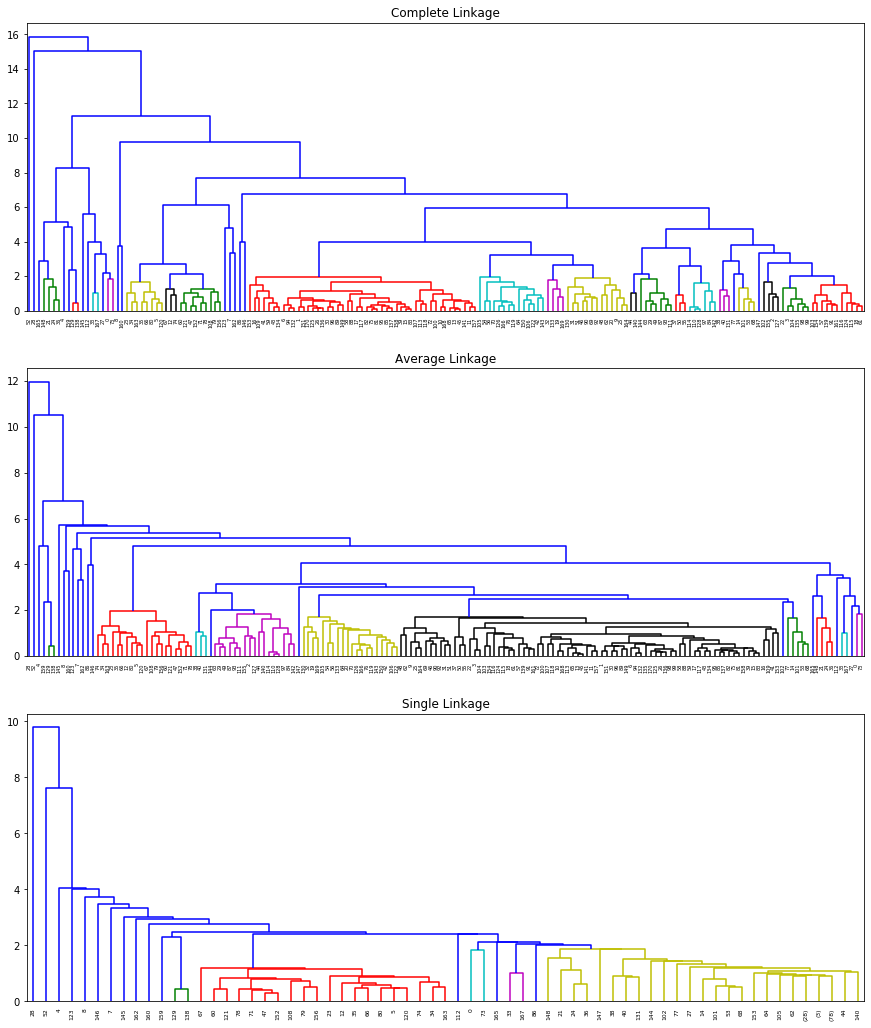

In [41]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

# This time we define linkage through functions instead of an argument
for linkage, cluster, ax in zip([shc.complete(pca_data),
                                 shc.average(pca_data),
                                 shc.single(pca_data)],
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    shc.dendrogram(linkage, ax=ax, color_threshold=2, truncate_mode='level',
                  )

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

Converged after 27 iterations.


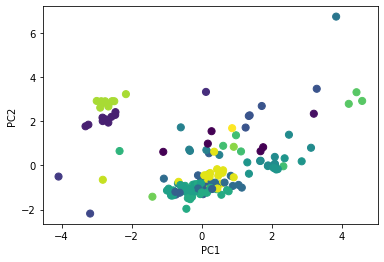

In [42]:
aff = AffinityPropagation(damping=.5, verbose=1)
predicted_aff = aff.fit_predict(pca_data)
plt.figure(figsize=(6,4))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=predicted_aff, s=50, cmap='viridis');